In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# %%
data = pd.read_csv("data.csv")

In [89]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [90]:
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

In [91]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

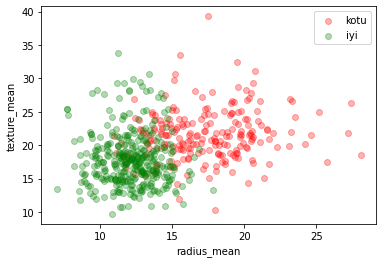

In [93]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [94]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [95]:
x.shape

(569, 30)

In [96]:
y.shape

(569,)

In [97]:
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [98]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [99]:
scaler = StandardScaler()

In [100]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
Acc=[]
for i in range(1,100):
  model_svm = SVC(C=i)
  model_svm.fit(x_train,y_train)
  y_pred = model_svm.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print("c -->",i,"accuracy score = ",acc)
  Acc.append(acc)

c --> 1 accuracy score =  0.9707602339181286
c --> 2 accuracy score =  0.9590643274853801
c --> 3 accuracy score =  0.9590643274853801
c --> 4 accuracy score =  0.9532163742690059
c --> 5 accuracy score =  0.9532163742690059
c --> 6 accuracy score =  0.9532163742690059
c --> 7 accuracy score =  0.9590643274853801
c --> 8 accuracy score =  0.9590643274853801
c --> 9 accuracy score =  0.9532163742690059
c --> 10 accuracy score =  0.9532163742690059
c --> 11 accuracy score =  0.9473684210526315
c --> 12 accuracy score =  0.9473684210526315
c --> 13 accuracy score =  0.9473684210526315
c --> 14 accuracy score =  0.9415204678362573
c --> 15 accuracy score =  0.9415204678362573
c --> 16 accuracy score =  0.9415204678362573
c --> 17 accuracy score =  0.9473684210526315
c --> 18 accuracy score =  0.9473684210526315
c --> 19 accuracy score =  0.9473684210526315
c --> 20 accuracy score =  0.9473684210526315
c --> 21 accuracy score =  0.9532163742690059
c --> 22 accuracy score =  0.95321637426900

In [102]:
max(Acc)

0.9707602339181286

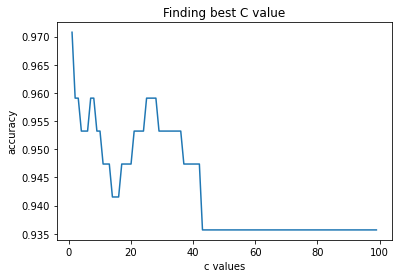

In [103]:
plt.plot(range(1,100),Acc)
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.title("Finding best C value")
plt.show()

In [104]:
# %% SVM

from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [105]:
# %% test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.9707602339181286


In [106]:
y_pred = svm.predict(x_test)  
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
print(matrix)

[[106   2]
 [  3  60]]


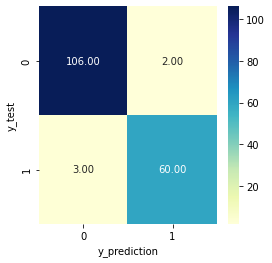

In [108]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# COMPARE OF SUPPORT VECTOR MACHINE and NAIVE BAYES ALGORITHMS

In [109]:
model_svm = SVC(C=1)

In [110]:
model_svm.fit(x_train,y_train)
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [111]:
y_pred_nb = model_nb.predict(x_test)
y_pred_svm = model_svm.predict(x_test)

In [112]:
acc_nb = accuracy_score(y_test,y_pred_nb)
acc_svm = accuracy_score(y_test,y_pred_svm)
print("accuracy score of SVM : ",acc_svm)
print("accuracy score of NB : ",acc_nb)

accuracy score of SVM :  0.9707602339181286
accuracy score of NB :  0.935672514619883
